In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import numpy as np
import os
import math
#from config import Base_url_one, Base_url_two
import time
import pandas as pd
import re

In [6]:
def get_page_num(driver, url):
    driver.get(url)
    try:
        page_info = driver.find_element_by_css_selector('.showing').text
        page_info = re.findall('[0-9]+',page_info)
        total_page_num = math.ceil(int(page_info[2]) / int(page_info[1]))
        print(total_page_num)
    except:
        total_page_num = 1
        pass    
    return total_page_num

In [7]:
def Find_items(driver_tab, url):
    information_tab = []
    driver_tab.get(url)
    time.sleep(5)
    
    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='vehicleModelDate']").text)
    except:
        information_tab.append("N/A")

    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='brand']").text)
    except:
        information_tab.append("N/A")

    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='model']").text)
    except:
        information_tab.append("N/A")

    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='bodyType']").text)
    except:
        information_tab.append("N/A")

    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='driveWheelConfiguration']").text)
    except:
        information_tab.append("N/A")
        
    try:
        information_tab.append(driver_tab.find_element_by_css_selector("dd[itemprop*='mileageFromOdometer']").text)
    except:
        information_tab.append("N/A")
        
    try:
        information_tab.append(driver_tab.find_element_by_css_selector("span[itemprop*='price']").get_attribute("content"))
    except:
        information_tab.append("N/A")
        
    
    return information_tab

In [ ]:
Main_List = []
Individal_List = []
url_links = []
url_links2 = []

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")

chrome_driver = os.getcwd() +"\\chromedriver.exe"

driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)
driver_tab = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)

#driver = webdriver.Chrome("chromedriver.exe")
#driver_tab = webdriver.Chrome("chromedriver.exe")

for Num_page in range(2,get_page_num(driver, 'https://www.kijiji.ca/b-cars-trucks/ontario/subaru-impreza-new__used/c174l9004a54a1000054a49')+1):    
    time.sleep(5)
    url_links = (driver.find_elements_by_css_selector("div[class*='search-item']"))
    print(len(url_links))
    
    for listing in url_links:
        Individal_url = "https:/www.kijiji.ca"+ str(listing.get_attribute("data-vip-url"))
        Individal_List.append(Individal_url)
        Individal_List.append(str(listing.get_attribute("data-listing-id")))
        Individal_List.extend(Find_items(driver_tab, Individal_url))
        Main_List.append(Individal_List)
        Individal_List = []
        
    time.sleep(5)
    driver.get('https://www.kijiji.ca/b-cars-trucks/ontario/subaru-impreza-new__used/page-' + str(Num_page) + '/c174l9004a54a1000054a49')

print(Main_List)
driver_tab.close()
driver.quit()

c:\robodk\python37\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':
c:\robodk\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


10
45


In [ ]:
df = pd.DataFrame(Main_List)
df.columns = ['Url', 'id','year', 'brand', 'model', 'bodytype' , 'drivingconfiguration', 'Odometer','Price']

In [ ]:
df.to_csv('Listings.csv')

In [89]:
df.round()

,Url,id,year,brand,model,bodytype,drivingconfiguration,Odometer,Price
0,https:/www.kijiji.ca/v-cars-trucks/north-bay/2...,1488048060,2017,Subaru,Impreza,Sedan,Other,"44,369",19995.00
1,https:/www.kijiji.ca/v-cars-trucks/guelph/2018...,1480823396,2018,Subaru,Impreza,Sedan,All-wheel drive (AWD),"28,651",23898.00
2,https:/www.kijiji.ca/v-cars-trucks/ottawa/2017...,1478513849,2017,Subaru,Impreza,Hatchback,All-wheel drive (AWD),"98,900",17398.00
3,https:/www.kijiji.ca/v-cars-trucks/london/2016...,1431221835,2016,Subaru,Impreza,Hatchback,All-wheel drive (AWD),"33,725",20495.00
4,https:/www.kijiji.ca/v-cars-trucks/cambridge/2...,1481098212,2010,Subaru,Impreza,Sedan,All-wheel drive (AWD),"175,000",9995.00
...,...,...,...,...,...,...,...,...,...
445,https:/www.kijiji.ca/v-cars-trucks/st-catharin...,1489166935,2002,Subaru,Impreza,Wagon,N/A,"210,000",3000.00
446,https:/www.kijiji.ca/v-cars-trucks/mississauga...,1489085179,2013,Subaru,Impreza,Sedan,All-wheel drive (AWD),"170,000",7500.00
447,https:/www.kijiji.ca/v-cars-trucks/oakville-ha...,1488974976,2012,Subaru,Impreza,Sedan,All-wheel drive (AWD),"159,366",12500.00
448,https:/www.kijiji.ca/v-cars-trucks/markham-yor...,1489022666,2011,Subaru,Impreza,Hatchback,All-wheel drive (AWD),"105,000",10000.00


In [90]:
grouped = df.loc[(df["year"] == "2008") & (df["bodytype"] == "Hatchback")]

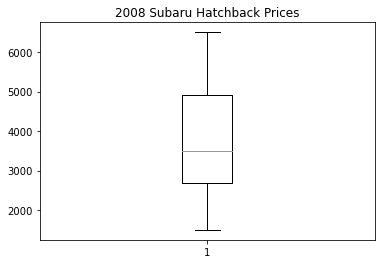

In [92]:
fig1, ax1 = plt.subplots()
data = list(map(float, grouped["Price"].tolist())) 
ax1.set_title("2008 Subaru Hatchback Prices")
ax1.boxplot(data)
plt.show()

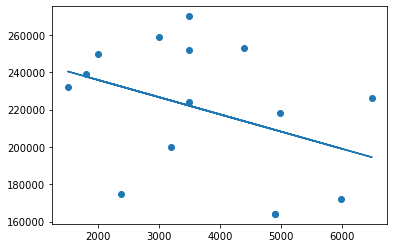

In [165]:
x = list(map(int,pd.to_numeric(grouped["Price"].tolist())))
y = grouped["Odometer"].tolist()

for index, value  in enumerate(y):
    y[index] = int(value.replace(',', '')) 
    
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, marker='o');
plt.plot(x, np.asarray(m)*x + b)

In [164]:
print(m*25000 + b)

24185.654498802236


In [167]:
print(grouped["Price"].quantile(.75))

AttributeError: 'list' object has no attribute 'quantile'